In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/newplacementdata - newplacementdata.csv")

In [ ]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


<Axes: xlabel='placement_exam_marks'>

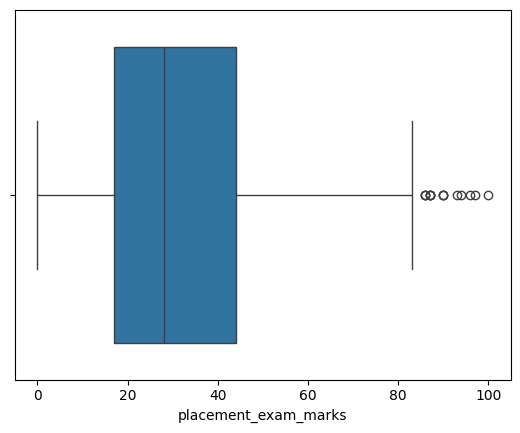

In [ ]:
sns.boxplot(x=df['placement_exam_marks'])

In [ ]:
#finding the iqr
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)

In [ ]:
percentile25

np.float64(17.0)

In [ ]:
percentile75

np.float64(44.0)

In [ ]:
IQR=percentile75-percentile25

In [ ]:
IQR

np.float64(27.0)

In [ ]:
upper_limit=percentile75+1.5*IQR
upper_limit

np.float64(84.5)

In [ ]:
lower_limit=percentile25-1.5*IQR
lower_limit

np.float64(-23.5)

Finding the outliers

In [ ]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [ ]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


In [ ]:
#triming--> 4(lower)..1 upper(25)....(50)  here 1,50 are outliers
#lower(4)    upper(25) mid data
#capping--> 4(lower)..1 upper(25)....(50)  capping lower point lowest point(1)
#upper point upper point(50)   Range Expand  outliers remove

In [ ]:
#triming(outlier removing technique 1)


In [ ]:
newdf=df[df['placement_exam_marks']<upper_limit]

In [ ]:
newdf

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


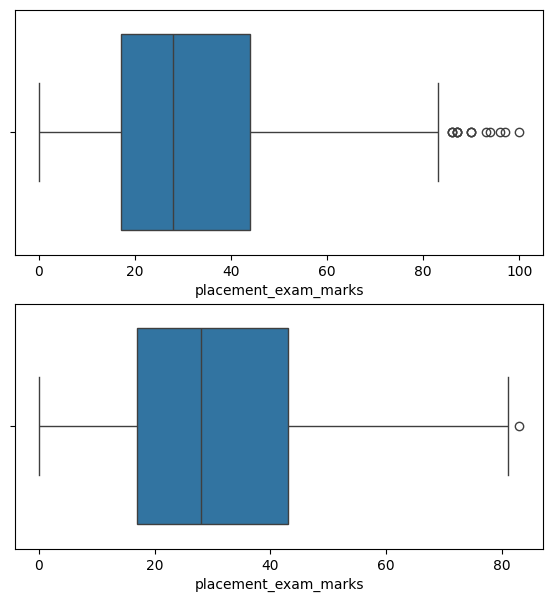

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(222)
sns.boxplot(x=df['placement_exam_marks'])
plt.subplot(224)
sns.boxplot(x=newdf['placement_exam_marks'])
plt.show()


In [ ]:
new_df_cap=df.copy()

In [ ]:
#capping
#min=5 max=15
#min=4,3,3
#max=20,30,35
#updated_min_values=3
#updated_max_values=35

In [ ]:
new_df_cap['placement_exam_marks']=np.where(

    new_df_cap['placement_exam_marks']>upper_limit,
    upper_limit,
    np.where(
    new_df_cap['placement_exam_marks']>lower_limit,
    lower_limit,
    new_df_cap['placement_exam_marks']
))

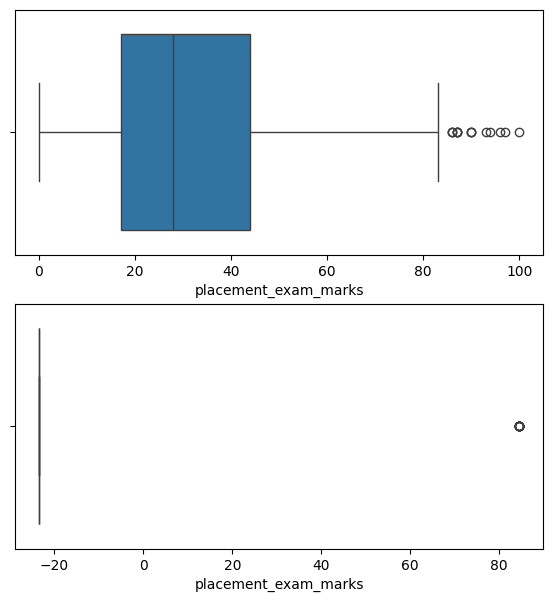

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(222)
sns.boxplot(x=df['placement_exam_marks'])
plt.subplot(224)
sns.boxplot(x=new_df_cap['placement_exam_marks'])
plt.show()


In [ ]:
new_df_cap.shape

(1000, 3)

In [ ]:
df=pd.read_csv("/content/titanic - titanic.csv")

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df['Age'].describe()

,Age
count,332.000000
mean,30.272590
std,14.181209
min,0.170000
25%,21.000000
50%,27.000000
75%,39.000000
max,76.000000


<Axes: xlabel='Age'>

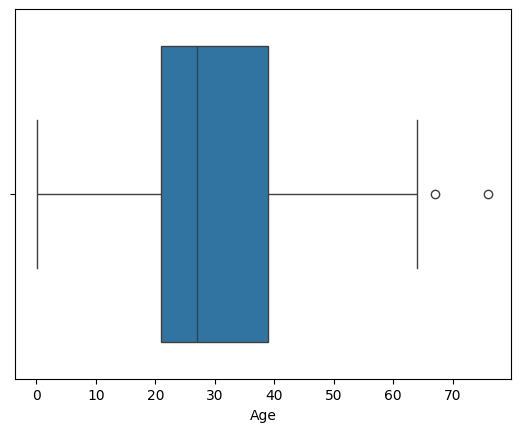

In [ ]:
sns.boxplot(x=df['Age'])

In [ ]:
percentile25=df['Age'].quantile(0.25)
percentile75=df['Age'].quantile(0.75)

In [ ]:
percentile25

np.float64(21.0)

In [ ]:
percentile75

np.float64(39.0)

In [ ]:
IQR=percentile75-percentile25
IQR

np.float64(18.0)

In [ ]:
upper_limit=percentile75+1.5*IQR
upper_limit

np.float64(66.0)

In [ ]:
lower_limit=percentile25-1.5*IQR
lower_limit

np.float64(-6.0)

In [ ]:
df[df['Age']>upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


In [ ]:
df[df['Age']<lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
newdf=df[df['Age']<upper_limit]

In [ ]:
newdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C


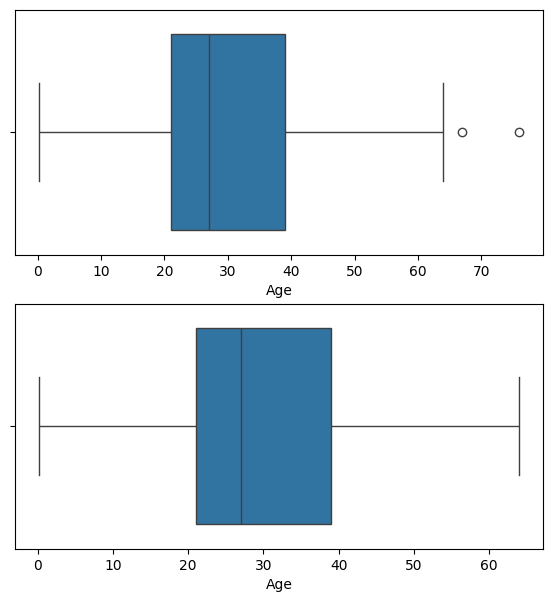

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(222)
sns.boxplot(x=df['Age'])
plt.subplot(224)
sns.boxplot(x=newdf['Age'])
plt.show()

In [ ]:
new_df_cap=df.copy()

In [ ]:
new_df_cap['Age']=np.where(

    new_df_cap['Age']>upper_limit,
    upper_limit,
    np.where(
    new_df_cap['Age']>lower_limit,
    lower_limit,
    new_df_cap['Age']
))

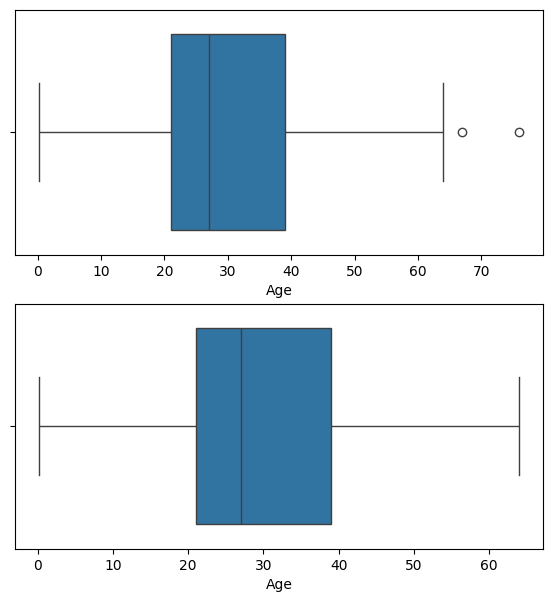

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(222)
sns.boxplot(x=df['Age'])
plt.subplot(224)
sns.boxplot(x=newdf['Age'])
plt.show()

In [ ]:
new_df_cap.shape

(418, 12)